In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


## Table of content
- [Clustering](#clustering)
    - [K means clustering](#kmeans_)
        - [Elbow Method](#elbow_method)
        - [Silhouette Method](#silhouette)
    - [DBSCAN](#dbscan)
- [Dimensionality Reduction](#dim_red)
    - [PCA](#pca)
    - [t-SNE](#t_sne)
- [Regression / Classification](#class_reg)
    - [Ordinary least squares](#ordinary_least_square)
    - [Logistic regression](#log_reg)
        - [Scaling (standardization, min-max scaling)](#scaling_reg)
        - [Res operations](#res_op)
        - [Matching](#matching_propens)
        - [Confusion Matrix and all other scores(t, accuracy, precision, recall, F1)](#confusion_scores)
    - [KNN](#knn)
    - [Random Forsest](#rand_forest)

# Clustering:

## Kmeans: <a class='anchor' id='kmeans_'></a>

Use scaling as well (in logistic regression you find the code)

In [3]:
from sklearn.cluster import KMeans
X = np.random.rand(50, 2)

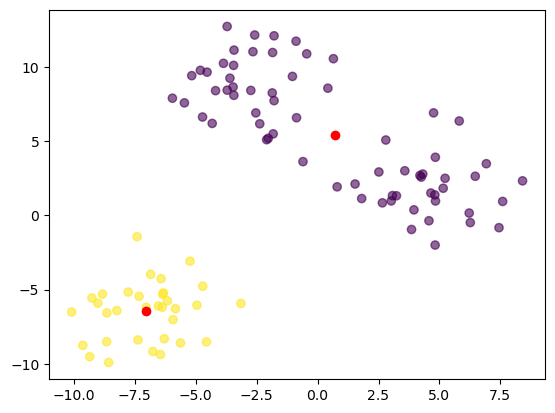

In [11]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
labels = KMeans(n_clusters=2, random_state=0).fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, alpha=0.6)
for c in kmeans.cluster_centers_:
    plt.scatter(c[0],c[1], marker='o', color='red')
plt.show()

In [ ]:
#Get more information:
kmeans.labels_
kmeans.cluster_centers_
kmeans.inertia_  #error (sse)
kmeans.n_iter_
kmeans.n_features_in_ #number of features
kmeans.feature_names_in_ #if the features have names


### Elbow Method: <a class='anchor' id='elbow_method'></a>

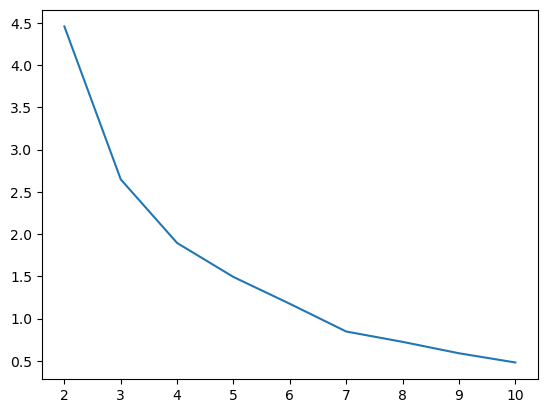

In [10]:
warnings.filterwarnings('ignore')
def plot_sse(features_X, start=2, end=11):
    sse = []
    for k in range(start, end):
        kmeans = KMeans(n_clusters=k, random_state=10).fit(features_X)
        sse.append({'k':k, 'sse': kmeans.inertia_})
    sse = pd.DataFrame(sse)
    plt.plot(sse.k, sse.sse)
    plt.grid()
'''Replace X'''
plot_sse(X)


### Silhoutte Scoring: <a class='anchor' id='silhouette'></a>

In [11]:
from sklearn.metrics import silhouette_score

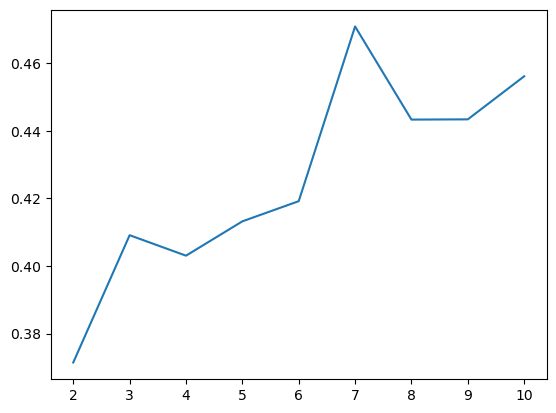

In [12]:
warnings.filterwarnings('ignore')
silhouettes = []
#try multiple ks
for k in range(2,11):
    '''replace X'''
    labels = KMeans(n_clusters = k, random_state=10).fit_predict(X)
    '''replace X'''
    score = silhouette_score(X, labels)
    silhouettes.append({'k':k, 'score':score})
silhouettes = pd.DataFrame(silhouettes)
plt.plot(silhouettes.k, silhouettes.score)
plt.grid()


## DBSCAN: <a class='anchor' id='dbscan'></a>

DBSCAN clusters by densities -> Clusters have high densities, outliers have low densities. <br>
First step: for every point, count the number of close points (distance < eps)<br>
We define core points -> points that are close to at least N (4) other points.<br>
Then only add core points to clusters. Once this is done you add the non-core points close to the cluster. <br>

In [14]:
from sklearn.cluster import DBSCAN

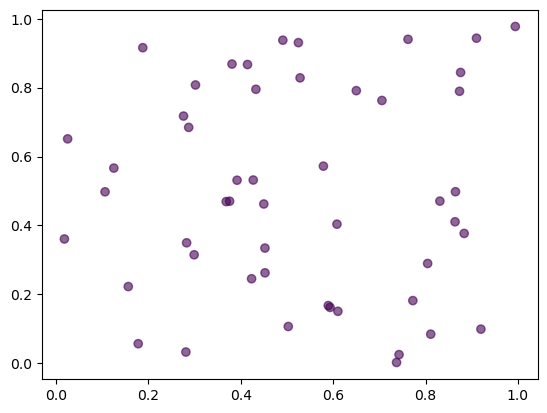

In [17]:
dbscan = DBSCAN(eps=0.5).fit(X)

plt.scatter(X[:,0], X[:,1], c=dbscan.labels_, alpha=0.6)
plt.show()

## Try different number of clusters and plot them (kmeans):

In [4]:
#generate data
import random
from sklearn.datasets import make_blobs
random.seed(42)
top_secret_number = random.randint(2, 10)

total_samples = 100

# This create some artifical clusters with standard dev. = 2, in 2D
X, _, centers = make_blobs(n_samples=total_samples, centers=top_secret_number, cluster_std=2, n_features=2, 
                            return_centers=True, random_state=42)


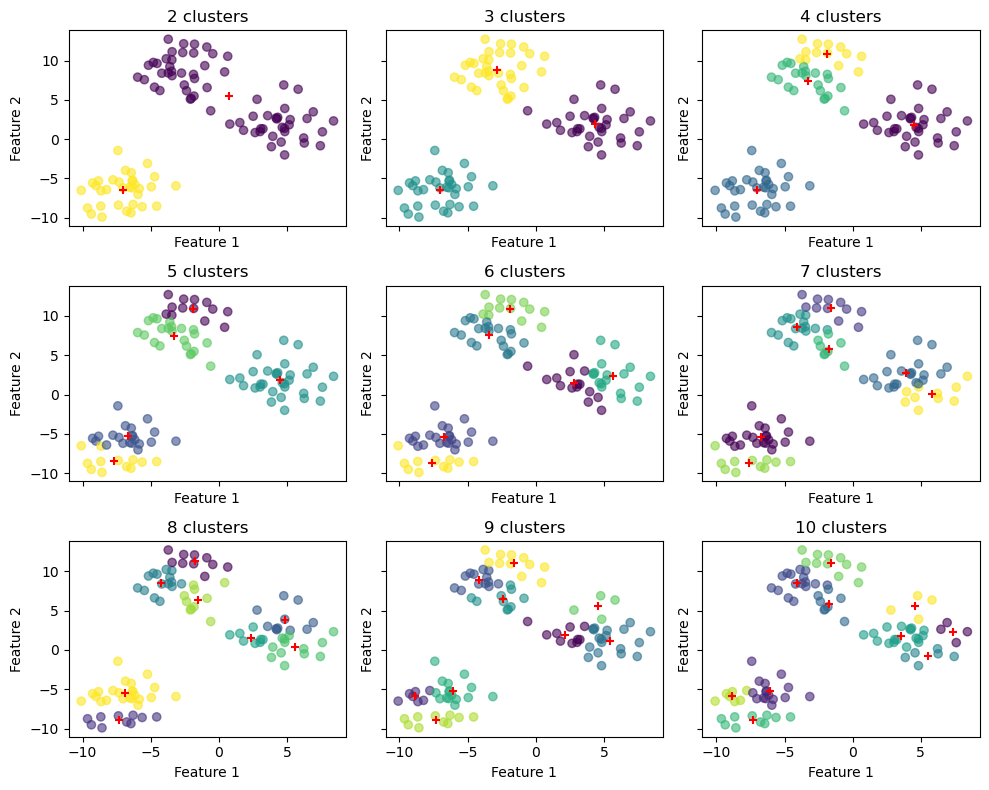

In [9]:
#plot kmeans using different amount of clusters:
import math
import warnings
from sklearn.cluster import KMeans
warnings.filterwarnings("ignore", category=UserWarning)

'''define number of clusters you want to try. Here 2-10'''
MIN_CLUSTERS = 2
MAX_CLUSTERS = 10

# Compute number of row and columns
'''define number of columns you want in your visualization'''
COLUMNS = 3
ROWS = math.ceil((MAX_CLUSTERS-MIN_CLUSTERS)/COLUMNS)
fig, axs = plt.subplots(ROWS, COLUMNS, figsize=(10,8), sharey=True, sharex=True)

# Plot the clusters
for n_clusters in range(MIN_CLUSTERS, MAX_CLUSTERS+1):
    # Get the axis where to add the plot
    ax = axs[(n_clusters-MIN_CLUSTERS)//COLUMNS, (n_clusters-MIN_CLUSTERS)%COLUMNS]
    # Cluster the data with the current number of clusters
    kmean = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    # Plot the data by using the labels as color
    ax.scatter(X[:,0], X[:,1], c=kmean.labels_, alpha=0.6)
    ax.set_title("%s clusters"%n_clusters)
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    # Plot the centroids
    for c in kmean.cluster_centers_:
        ax.scatter(c[0], c[1], marker="+", color="red")

plt.tight_layout()

# Dimensionality Reduction: <a class='anchor' id='dim_red'></a>

## PCA: <a class='anchor' id='pca'></a>

In [18]:
from sklearn.decomposition import PCA

In [19]:
X_reduced_pca = PCA(n_components=1).fit(X).transform(X)
#n_components defines how many dimensions we want to have in the end.

## t-SNE: <a class='anchor' id='t_sne'></a>

In [22]:
from sklearn.manifold import TSNE

In [24]:
'''replace n_components and X'''
X_reduced_tsne = TSNE(n_components=1, init='random', learning_rate='auto', random_state=0).fit_transform(X)
#n_components defines to how many dimensions we want to reduce X

# Classification/Regression <a class='anchor' id='class_reg'></a>

## Regression: <a class='anchor' id='regression_'></a>

In [ ]:
df_regression = pd.DataFrame({'ftr1': [1, 2, 3, 4, 5], 'ftr2': [1, 4, 9, 16, 25], 'ftr3': ['a','b','b','a','b'],
                            'log_output': [1, 0, 0,1,0]})

### Linear Regression / Ordinary least squares: <a class='anchor' id='ordinary_least_square'></a>

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
#ftr3 is categorical, ftr1/2 are continuous
#binary is also categorical
#interaction is written ftr1:ftr2
mod = smf.ols(formula='ftr1~ ftr2 + ftr1:ftr2 + C(ftr3)', data=df_regression)
res = mod.fit()
print(res.summary())

'''
ftr1*ftr2 = ftr1 + ftr2 + ftr1:ftr2

Multiplicative model:
By transforming the outcome variable to a logarithmic scale, the coefficients will be multiplicative instead of additive
df['outcome_var']=df['outcome_var'].apply(lambda x: np.log(x))
A coefficient of z, will no longer increase the outcome variable by z but will multiply the outcome variable by e^z.
'''

                            OLS Regression Results                            
Dep. Variable:                   ftr1   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     2470.
Date:                Mon, 02 Jan 2023   Prob (F-statistic):             0.0148
Time:                        13:20:08   Log-Likelihood:                 15.740
No. Observations:                   5   AIC:                            -23.48
Df Residuals:                       1   BIC:                            -25.04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.1708      0.022      7.613   

c:\Users\flori\anaconda3\envs\ada\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


R-square: fraction of explained variance. <br>
Nb obesrvations: number of datapoints. <br>

In [ ]:
#sklearn
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()  # create the model
y=df_regression['ftr1']
X=df_regression[['ftr2', 'log_output']]
lin_reg.fit(X, y)  # train it

#get_coefficients
lin_reg.coef_ #first one is the intercept

LinearRegression()

Print predicted vs. original

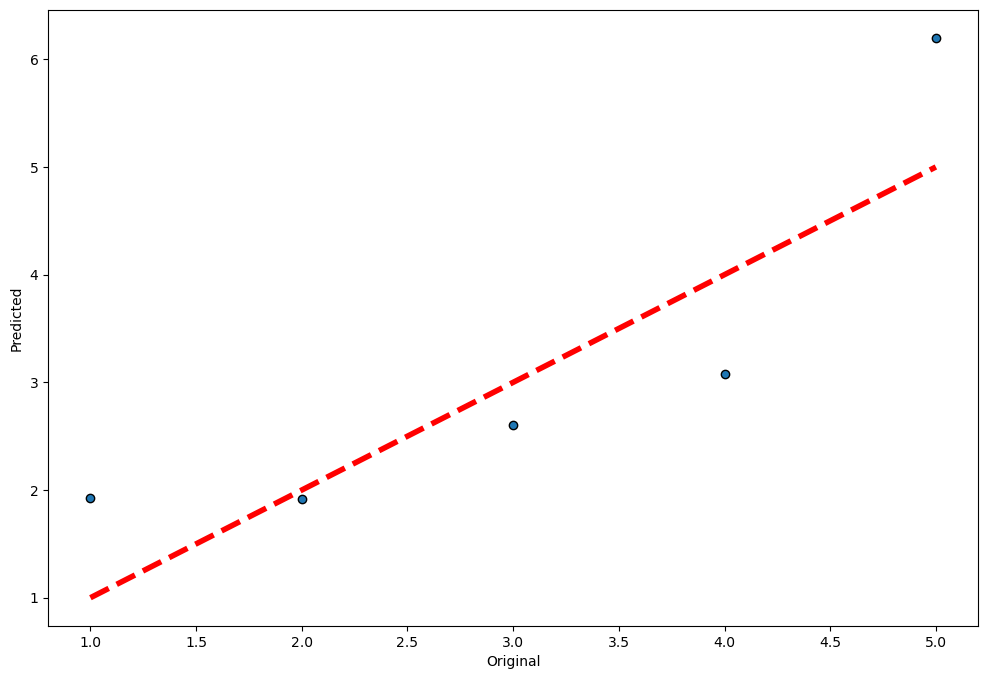

In [ ]:
from sklearn.model_selection import cross_val_predict
lr = LinearRegression()

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(lr, X, y, cv=5)

# Plot the results
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([min(y), max(y)], [min(y), max(y)], 'r--', lw=4)
ax.set_xlabel('Original')
ax.set_ylabel('Predicted')
plt.show()

### Logistic Regression: <a class='anchor' id='log_reg'></a> <br>
predicts a binary and not continuous outcome 

#### Scaling:  <a class='anchor' id='scaling_reg'></a>
To avoid to weight features with big values higher. <br>
And scale even dummy variables! <br>
Standardization is one form of scaling. <br>
Min-max scaling is another one.

In [ ]:
# for logistic regression:
#standardization

df_regression['ftr1'] = (df_regression['ftr1'] - df_regression['ftr1'].mean())/df_regression['ftr1'].std()
df_regression['ftr2'] = (df_regression['ftr2'] - df_regression['ftr2'].mean())/df_regression['ftr2'].std()

'''Iterative:
for c in df.columns:
    #don't standardize the outcome variable!
    if (c != 'y'):
        df[c] = (df[c]-df[c].mean())/df[c].std()
'''

#Min max scaling

#df_regression['ftr1'] = (df_regression['ftr1'] - df_regression['ftr1'].min())/(df_regression['ftr1'].max() - df_regression['ftr1'].min())
#df_regression['ftr2'] = (df_regression['ftr1'] - df_regression['ftr2'].min())/(df_regression['ftr2'].max() - df_regression['ftr2'].min())


For some reason the following scalings do not get the same final results as the one above. <br>
Apparently the first cell gives you a standardization where std is exactly 1 and the mean is close to zero, whereas the 
cells below give a result where the mean is exactly 0 and the std is very close to 1. <br>
Use the above, as they used it in the exercise solutions.

In [ ]:
#scipy scaling
from scipy import stats
df_regression_2 = pd.DataFrame({'ftr1': [1, 2, 3, 4, 5], 'ftr2': [1, 4, 9, 16, 25], 'ftr3': ['a','b','b','a','b']})
df_regression_2['ftr1'] = stats.zscore(df_regression_2['ftr1'])

In [ ]:
#sklearn scaling
from sklearn.preprocessing import MinMaxScaler
df_regression_2 = pd.DataFrame({'ftr1': [1, 2, 3, 4, 5], 'ftr2': [1, 4, 9, 16, 25], 'ftr3': ['a','b','b','a','b']})
scaler = MinMaxScaler()

df_regression_2['ftr2'] = scaler.fit_transform(df_regression_2['ftr2'].values.reshape(-1, 1))

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_regression_2['ftr1'] = scaler.fit_transform(df_regression_2['ftr1'].values.reshape(-1, 1))


#### Code:

##### Statsmodel (Res):

In [ ]:
#import statsmodels.formula.api as smf

mod = smf.logit(formula='log_output~ ftr2+ ftr1:ftr2', data=df_regression) #categorical C(ftr3)
np.random.seed(2)
res = mod.fit()
print(res.summary())

'''
ftr1*ftr2 = ftr1 + ftr2 + ftr1:ftr2

Interpretation:
If ftr1 has a value coefficient of 0.6, this means that the increase of this ftr by 1 standard deviation leads in average
to an increaes of 0.6 log odds for the predicted outcome (when all other predictors take mean values).
Log odd = 1/(1-p) where p is the probability for the given outcome. (see log-odds and p)
'''

Optimization terminated successfully.
         Current function value: 0.642612
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:             log_output   No. Observations:                    5
Model:                          Logit   Df Residuals:                        2
Method:                           MLE   Df Model:                            2
Date:                Wed, 04 Jan 2023   Pseudo R-squ.:                 0.04517
Time:                        14:43:12   Log-Likelihood:                -3.2131
converged:                       True   LL-Null:                       -3.3651
Covariance Type:            nonrobust   LLR p-value:                    0.8590
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4262      2.244      0.190      0.849      -3.973       4.825
ftr2          -0.1506      0.

'\nftr1*ftr2 = ftr1 + ftr2 + ftr1:ftr2\n\nInterpretation:\nIf ftr1 has a value coefficient of 0.6, this means that the increase of this ftr by 1 standard deviation leads in average\nto an increaes of 0.6 log odds for the predicted outcome (when all other predictors take mean values).\nLog odd = 1/(1-p) where p is the probability for the given outcome. (see log-odds and p)\n'

##### Sklearn (logistic):

In [ ]:
# Use sklearn
from sklearn.linear_model import LogisticRegression
y=df_regression['log_output']
X=df_regression[['ftr2', 'ftr1']]

logistic = LogisticRegression(solver='lbfgs')
logistic.fit(X.values, y)


'''predict:'''
#Give a value for every column entry of X to predict the outcome
decision = logistic.predict([[5, 1]])
# get's you 0 or 1
'''Get the probability distribution behind the prediction'''
distribution = logistic.predict_proba([[5,1]])
#Returns 2 values: first, probability for outcome 1, then probability for outcome two
'''COEFFICIENTS'''
logistic.coef_

array([[0.4740105, 0.5259895]])

#### Confusion Matrix and all other scores(t, accuracy, precision, recall, F1): <a class='anchor' id='confusion_scores'></a>

In [ ]:
#If you get only the probabilities without decision threshold
def compute_confusion_matrix(true_label, prediction_proba, decision_threshold=0.5): 
    
    predict_label = (prediction_proba[:,1]>decision_threshold).astype(int)   
                                                                                                                       
    TP = np.sum(np.logical_and(predict_label==1, true_label==1))
    TN = np.sum(np.logical_and(predict_label==0, true_label==0))
    FP = np.sum(np.logical_and(predict_label==1, true_label==0))
    FN = np.sum(np.logical_and(predict_label==0, true_label==1))
    
    confusion_matrix = np.asarray([[TP, FP],
                                    [FN, TN]])
    return confusion_matrix

#If you get the predicted labels
def compute_confusion_matrix_prediction_only(true_label, predict_label):   
                                                                                                                       
    TP = np.sum(np.logical_and(predict_label==1, true_label==1))
    TN = np.sum(np.logical_and(predict_label==0, true_label==0))
    FP = np.sum(np.logical_and(predict_label==1, true_label==0))
    FN = np.sum(np.logical_and(predict_label==0, true_label==1))
    
    confusion_matrix = np.asarray([[TP, FP],
                                    [FN, TN]])
    return confusion_matrix


def plot_confusion_matrix(confusion_matrix):
    [[TP, FP],[FN, TN]] = confusion_matrix
    label = np.asarray([['TP {}'.format(TP), 'FP {}'.format(FP)],
                        ['FN {}'.format(FN), 'TN {}'.format(TN)]])
    
    df_cm = pd.DataFrame(confusion_matrix, index=['Yes', 'No'], columns=['Positive', 'Negative']) 
    
    return sns.heatmap(df_cm, cmap='YlOrRd', annot=label, annot_kws={"size": 16}, cbar=False, fmt='')

#We have an accuracy/recall/F-value for the case when the label is negative and for the case when the label is positive.
#look at the confusion matrix plotted below for more clarity.
def compute_all_score(confusion_matrix, t=0.5):
    [[TP, FP],[FN, TN]] = confusion_matrix.astype(float)
    
    accuracy =  (TP+TN)/np.sum(confusion_matrix)
    
    precision_positive = TP/(TP+FP) if (TP+FP) !=0 else np.nan
    precision_negative = TN/(TN+FN) if (TN+FN) !=0 else np.nan
    
    recall_positive = TP/(TP+FN) if (TP+FN) !=0 else np.nan
    recall_negative = TN/(TN+FP) if (TN+FP) !=0 else np.nan

    F1_score_positive = 2 *(precision_positive*recall_positive)/(precision_positive+recall_positive) if (precision_positive+recall_positive) !=0 else np.nan
    F1_score_negative = 2 *(precision_negative*recall_negative)/(precision_negative+recall_negative) if (precision_negative+recall_negative) !=0 else np.nan

    return [t, accuracy, precision_positive, recall_positive, F1_score_positive, precision_negative, recall_negative, F1_score_negative]


'''Plotting
    confusion_matrix_05 = compute_confusion_matrix(test_label, prediction_proba, 0.5 )
    plt.figure(figsize = (4,3)) 
    ax = plot_confusion_matrix(confusion_matrix_05)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Confusion matrix for a 0.5 threshold')
'''

In [ ]:
#Test different thresholds:

'''modifiy the thresholds you want to test'''
threshold = np.linspace(0, 1, 100)
columns_score_name = ['Threshold', 'Accuracy', 'Precision P', 'Recall P', 'F1 score P', \
                                              'Precision N', 'Recall N', 'F1 score N']
                                              
'''replace test_label. predicted proba is logistic.predict_proba()'''
threshold_score = pd.concat([pd.DataFrame([compute_all_score(compute_confusion_matrix(test_label, predicted_proba, t ),t)]\
                                             , columns=columns_score_name) for t in threshold], ignore_index=True)
threshold_score.set_index('Threshold', inplace=True)

### res operations: <a class='anchor' id='res_op'></a>

In [ ]:
#get the INDEX of the variables in the model:
res.params.index #'Intercept', 'C(ftr3)', 'ftr2', 'ftr1:ftr2'

#Get the COEFFICIENTS:
res.params.values

#Get the P-VALUES
res.pvalues

#Get the STANDARD ERRORS
res.bse.values

#Get CONFIDENCE INTERVALS
res.conf_int()

#Get PREDICTED VALUES from the model, using the training datapoints
#Gives also the PROPENSITY SCORE
res.predict()

array([0.62296135, 0.47903791, 0.34604659, 0.27248733, 0.27946682])

### Precision and Recall: <a class='anchor' id='precision_recall'></a>

In [ ]:
'''You cannot run it as the test dataframes are too small for the cross validation'''
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
logistic = LogisticRegression(solver='lbfgs')

#cv number of splits in cross validation (number of groups to make from data)
precision = cross_val_score(logistic, X, y, cv=3, scoring="precision")
recall = cross_val_score(logistic, X, y, cv=3, scoring="recall")
#You get a precision for every experiment

ValueError: n_splits=3 cannot be greater than the number of members in each class.

### ROC curve: <a class='anchor' id='roc_curve'></a>

The ROC curve is computed by varying the classification threshold.

In [ ]:
'''You cannot run it as the test dataframes are too small for the cross validation'''
from sklearn.metrics import auc, roc_curve
logistic = LogisticRegression(solver='lbfgs')

y_pred = cross_val_predict(logistic, X, y, cv=10, method="predict_proba")
# Compute the False Positive Rate and True Positive Rate
fpr, tpr, _ = roc_curve(y, y_pred[:, 1])
# Compute the area under the fpt-tpf curve
auc_score = auc(fpr, tpr)

'''Plotting:
Plotting:
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Area = {:.5f}".format(auc_score))
'''

### Matching: <a class='anchor' id='matching_propens'></a>

In [ ]:
#define a function to compute the similarity score.
def get_similarity(propensity_score1, propensity_score2):
    return 1-np.abs(propensity_score1-propensity_score2)

In [ ]:
import networkx as nx

In [ ]:
'''remove (for exam code)'''
df_reg = df_regression.copy()
mod_ = smf.logit(formula='log_output~ ftr2', data=df_reg) #categorical C(ftr3)
res_ = mod_.fit()
df_reg['propensity_score'] = res_.predict()
'''till here'''

# Separate the treatment and control groups
'''change both lines'''
treatment_df = df_reg[df_reg['log_output'] == 1]
control_df = df_reg[df_reg['log_output'] == 0]

# Create an empty undirected graph
G = nx.Graph()

# Loop through all the pairs of instances
for control_id, control_row in control_df.iterrows():
    for treatment_id, treatment_row in treatment_df.iterrows():

        # Calculate the similarity 
        '''Check whether you wrote propensity score like here'''
        similarity = get_similarity(control_row['propensity_score'],
                                    treatment_row['propensity_score'])

        # Add an edge between the two instances weighted by the similarity between them
        G.add_weighted_edges_from([(control_id, treatment_id, similarity)])

# Generate and return the maximum weight matching on the generated graph
matching = nx.max_weight_matching(G)

matched = [i[0] for i in list(matching)] + [i[1] for i in list(matching)]

'''change this line'''
balanced_df_1 = df_reg.iloc[matched]

Optimization terminated successfully.
         Current function value: 0.644165
         Iterations 5


Should you get a still unbalanced feature / variable and you want to add an additional condition, you can do it as follows:

Let's say we a set of patients that we want to match. <br>
We balance it a first time and take a look at the matched dataset. <br>
We see that we have far more blond and swiss german people in the treated group than in the control group. <br>
We can say that we only want links, if the haircolor and the language is the same. <br>
In the code below you find additional code that allows that. categorical_unbalanced_ftr1 could be hair color and categorical_unbalanced_ftr2 could be language.

In [ ]:
'''remove (for exam code)'''
df_reg = df_regression.copy()
mod_ = smf.logit(formula='log_output~ ftr2', data=df_reg) #categorical C(ftr3)
res_ = mod_.fit()
df_reg['propensity_score'] = res_.predict()
'''till here'''

# Separate the treatment and control groups
'''change both lines'''
treatment_df = df_reg[df_reg['log_output'] == 1]
control_df = df_reg[df_reg['log_output'] == 0]

# Create an empty undirected graph
G = nx.Graph()

# Loop through all the pairs of instances
for control_id, control_row in control_df.iterrows():
    for treatment_id, treatment_row in treatment_df.iterrows():

        # Calculate the similarity
        '''ADDED PART OF CODE:'''
        if (control_row['categorical_unbalanced_ftr1'] == treatment_row['categorical_unbalanced_ftr1'])\
            and (control_row['categorical_unbalanced_ftr2'] == treatment_row['categorical_unbalanced_ftr2']):
            '''UNTIL HERE'''
            '''Check whether you wrote propensity score like here'''
            similarity = get_similarity(control_row['propensity_score'],
                                        treatment_row['propensity_score'])

        # Add an edge between the two instances weighted by the similarity between them
        G.add_weighted_edges_from([(control_id, treatment_id, similarity)])

# Generate and return the maximum weight matching on the generated graph
matching = nx.max_weight_matching(G)

matched = [i[0] for i in list(matching)] + [i[1] for i in list(matching)]

'''change this line'''
balanced_df_1 = df_reg.iloc[matched]

### Regularization: <a class='anchor' id='regularization'></a>

Regularizations try to prevent overfitting. <br>
Ridge-Regression penalties large weights for $\beta_i$ to reduce the complexity of the model.

In [ ]:
#Ridge Regression
from sklearn.linear_model import Ridge
y=df_regression['ftr1']
X=df_regression[['ftr2', 'log_output']]

#alpha is the penalty term
ridge = Ridge(alpha=6)

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted_r = cross_val_predict(ridge, X, y, cv=5) #cv in how many groups the dataset is split

'''Use 'Print predicted vs. original' from above to visualize'''

"Use 'Print predicted vs. original' from above to visualize"

## KNN: <a class='anchor' id='knn'></a>

### Plot predictions fancy:

In [2]:
from matplotlib.colors import ListedColormap

def plot_prediction(model, X, y, ax, K):
    # step size in the mesh
    h = .02
    # Create color maps
    cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
    cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')

    # Plot also the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_title("K = {}".format(K))

### Code:

Make the dataset to test on:

In [1]:
from sklearn.datasets import make_moons, make_gaussian_quantiles
from sklearn.model_selection import train_test_split

X_moons, y_moons = make_moons(500, noise=0.2, random_state=0)
X_circles, y_circles = make_gaussian_quantiles(n_samples=100, random_state=0)

'''Plotting
fig, axs = plt.subplots(1, 2, figsize=(9,4))

axs[0].scatter(X_moons[:,0], X_moons[:,1], c=y_moons)
axs[0].set_title('Moon Data')

axs[1].scatter(X_circles[:,0], X_circles[:,1], c=y_circles)
axs[1].set_title('Circles')'''

"Plotting\nfig, axs = plt.subplots(1, 2, figsize=(9,4))\n\naxs[0].scatter(X_moons[:,0], X_moons[:,1], c=y_moons)\naxs[0].set_title('Moon Data')\n\naxs[1].scatter(X_circles[:,0], X_circles[:,1], c=y_circles)\naxs[1].set_title('Circles')"

In [3]:
from sklearn.neighbors import KNeighborsClassifier

# K = 1
clf_moons_1 = KNeighborsClassifier(1)
clf_moons_1.fit(X_moons, y_moons)
clf_circles_1 = KNeighborsClassifier(1)
clf_circles_1.fit(X_circles, y_circles)

# K = 15
clf_moons_15 = KNeighborsClassifier(15)
clf_moons_15.fit(X_moons, y_moons)
clf_circles_15 = KNeighborsClassifier(15)
clf_circles_15.fit(X_circles, y_circles)

'''Plot
fig, axs = plt.subplots(2, 2, figsize=(12,9))

plot_prediction(clf_moons_1, X_moons, y_moons, axs[0][0], 1)
plot_prediction(clf_circles_1, X_circles, y_circles, axs[0][1], 1)

plot_prediction(clf_moons_15, X_moons, y_moons, axs[1][0], 15)
plot_prediction(clf_circles_15, X_circles, y_circles, axs[1][1], 15)
'''

KNeighborsClassifier(n_neighbors=15)

## Random Forest: <a class='anchor' id='rand_forest'></a>

You find the data used in tutorial 06.

In [ ]:
# Load the data (tutorial 06)
titanic = pd.read_excel('data/titanic.xls')
titanic_features = ['sex', 'age', 'sibsp', 'parch', 'fare']
X = pd.get_dummies(titanic[titanic_features])
X = X.fillna(X.mean())
y = titanic['survived']

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

#number of trees, here we will try from 1 to 21
number_trees = [n for n in range(1, 21)]
precision_scores = []
recalls_scores = []


for nt in number_trees:
    #max_depth defines how many branches the tree can have
    clf = RandomForestClassifier(max_depth=3, random_state=0, n_estimators=nt)
    clf.fit(X, y)
    precision = cross_val_score(clf, X, y, cv=10, scoring="precision")
    precision_scores.append(precision.mean())
    recall = cross_val_score(clf, X, y, cv=10, scoring="recall")
    recalls_scores.append(recall.mean())

'''Plotting
fig, ax = plt.subplots(1, figsize=(6,4))

ax.plot(number_trees, precision_scores, label="Precision")
ax.plot(number_trees, recalls_scores, label="Recall")

ax.set_ylabel("Score value")
ax.set_xlabel("Number of trees")
ax.legend()
'''